In [5]:
import pandas as pd
from pathlib import Path

csv_folder = Path(r"E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv")  

csv_files = list(csv_folder.glob("*.csv"))

df_all = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

print(df_all.head())
print(f"Total rows combined: {len(df_all)}")


     Ticker    close                 date     high      low    month     open  \
0  ADANIENT  2387.25  2023-10-03 05:30:00  2424.90  2372.00  2023-10  2418.00   
1  ADANIENT  2464.95  2023-10-04 05:30:00  2502.75  2392.25  2023-10  2402.20   
2  ADANIENT  2466.35  2023-10-05 05:30:00  2486.50  2446.40  2023-10  2477.95   
3  ADANIENT  2478.10  2023-10-06 05:30:00  2514.95  2466.05  2023-10  2466.35   
4  ADANIENT  2442.60  2023-10-09 05:30:00  2459.70  2411.30  2023-10  2440.00   

    volume  
0  2019899  
1  2857377  
2  1132455  
3  1510035  
4  1408224  
Total rows combined: 28400


In [6]:
import pandas as pd

# Assuming df_all is your combined DataFrame from all ticker CSVs
df_all['date'] = pd.to_datetime(df_all['date'])

# Step 1: Get the first and last price for each stock (yearly return)
df_sorted = df_all.sort_values(by=['Ticker', 'date'])

first_prices = df_sorted.groupby('Ticker').first()['close']
last_prices = df_sorted.groupby('Ticker').last()['close']

# Step 2: Calculate % return
returns = ((last_prices - first_prices) / first_prices) * 100
returns_df = returns.reset_index().rename(columns={'close': 'yearly_return_pct'})

# Step 3: Merge back with last stock data for price and volume info
latest_data = df_sorted.groupby('Ticker').last().reset_index()
metrics_df = pd.merge(latest_data, returns_df, on='Ticker')

# Top 10 Green Stocks (highest return)
top_10_green = metrics_df.sort_values(by='yearly_return_pct', ascending=False).head(10)

# Top 10 Loss Stocks (lowest return)
top_10_loss = metrics_df.sort_values(by='yearly_return_pct').head(10)

# Market Summary
green_count = (metrics_df['yearly_return_pct'] > 0).sum()
red_count = (metrics_df['yearly_return_pct'] <= 0).sum()
avg_price = metrics_df['close'].mean()
avg_volume = metrics_df['volume'].mean()

market_summary = {
    'Green Stocks': green_count,
    'Red Stocks': red_count,
    'Average Price': round(avg_price, 2),
    'Average Volume': round(avg_volume)
}

# Show results
print("🔝 Top 10 Green Stocks")
print(top_10_green[['Ticker', 'yearly_return_pct', 'close', 'volume']])

print("\n🔻 Top 10 Loss Stocks")
print(top_10_loss[['Ticker', 'yearly_return_pct', 'close', 'volume']])

print("\n📊 Market Summary")
print(market_summary)


🔝 Top 10 Green Stocks
        Ticker  yearly_return_pct    close    volume
47       TRENT         223.092613  6652.80    833104
8          BEL         101.760057   280.85  13268900
30         M&M          95.976974  3012.95   4827125
5   BAJAJ-AUTO          89.011153  9481.65    619823
9   BHARTIARTL          69.599049  1569.30   7640321
35   POWERGRID          68.854924   336.95  31523269
10        BPCL          67.477150   285.85   6539977
20  HEROMOTOCO          58.976655  4794.10    394712
40   SUNPHARMA          57.282404  1795.30   1420813
17     HCLTECH          53.257447  1898.40   2765950

🔻 Top 10 Loss Stocks
        Ticker  yearly_return_pct     close    volume
24  INDUSINDBK         -30.458409    998.20   4026863
3   ASIANPAINT         -21.935046   2472.20   3805854
7   BAJFINANCE         -16.110874   6683.95    969855
0     ADANIENT          -6.670856   2228.00  20939196
22  HINDUNILVR          -0.957916   2445.25   1696471
32   NESTLEIND           0.707141   2247.30    77

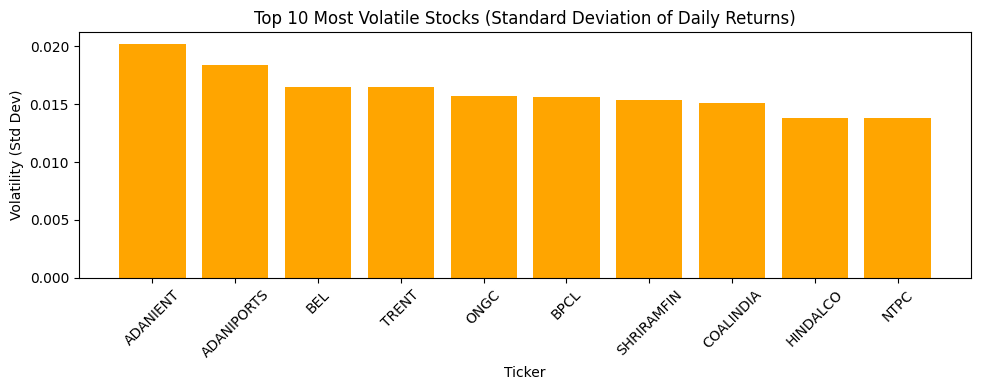

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Step 1: Define the folder containing CSV files
csv_folder = Path("path/to/your/csv_folder")  # Change this to your actual path
csv_files = list(csv_folder.glob("*.csv"))

# Step 2: Read and combine all CSV files
# df_all = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)
df_all['date'] = pd.to_datetime(df_all['date'])

# Step 3: Sort by Ticker and Date
df_all = df_all.sort_values(by=['Ticker', 'date'])

# Step 4: Calculate daily returns
df_all['prev_close'] = df_all.groupby('Ticker')['close'].shift(1)
df_all['daily_return'] = (df_all['close'] - df_all['prev_close']) / df_all['prev_close']

# Step 5: Compute standard deviation of daily returns for each stock
volatility_df = df_all.groupby('Ticker')['daily_return'].std().reset_index()
volatility_df = volatility_df.rename(columns={'daily_return': 'volatility'})

# Step 6: Get top 10 most volatile stocks
top_10_volatile = volatility_df.sort_values(by='volatility', ascending=False).head(10)

# Step 7: Plotting
plt.figure(figsize=(10, 4))
plt.bar(top_10_volatile['Ticker'], top_10_volatile['volatility'], color='orange')
plt.title("Top 10 Most Volatile Stocks (Standard Deviation of Daily Returns)")
plt.xlabel("Ticker")
plt.ylabel("Volatility (Std Dev)")
plt.xticks(rotation=45)
plt.tight_layout()

# Step 8: Save the chart
plt.savefig("top_10_volatile_stocks.png")
plt.show()


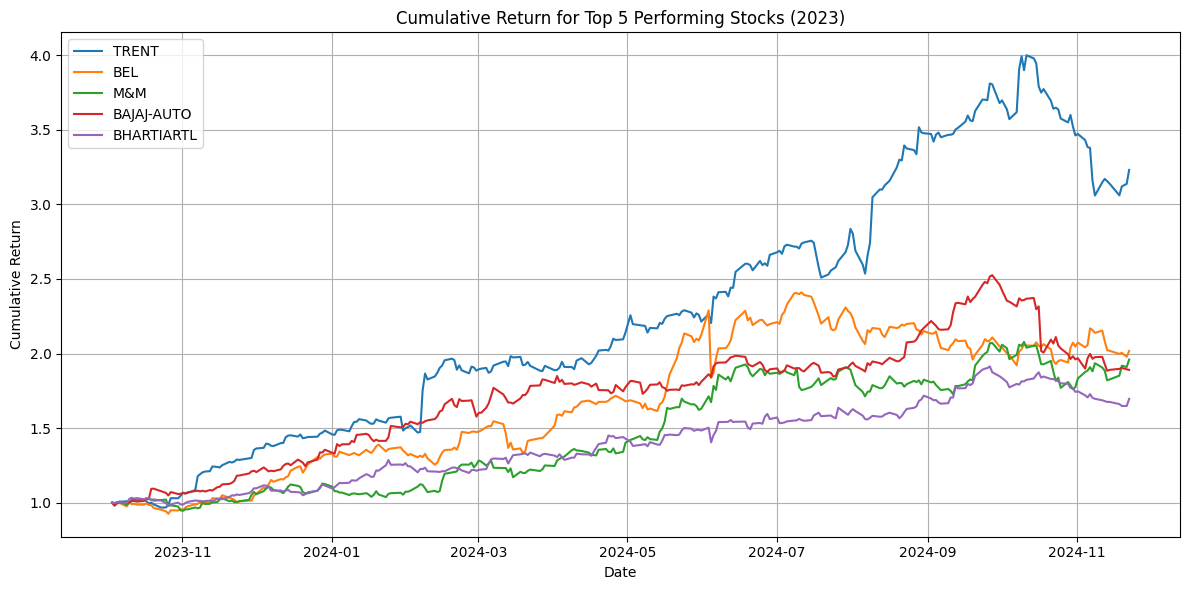

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
stock_data = df_all

# Convert 'date' column to datetime
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Sort by Ticker and date
stock_data.sort_values(by=['Ticker', 'date'], inplace=True)

# Calculate daily return for each Ticker
stock_data['daily_return'] = stock_data.groupby('Ticker')['close'].pct_change()

# Calculate cumulative return
stock_data['cumulative_return'] = (1 + stock_data['daily_return']).groupby(stock_data['Ticker']).cumprod()

# Get the last cumulative return for each stock
final_cum_return = stock_data.groupby('Ticker').agg({'cumulative_return': 'last'})

# Select top 5 performing stocks
top_5_stocks = final_cum_return.sort_values(by='cumulative_return', ascending=False).head(5).index.tolist()

# Filter data for top 5 stocks
top_5_data = stock_data[stock_data['Ticker'].isin(top_5_stocks)]

# Plot cumulative return over time
plt.figure(figsize=(12, 6))
for ticker in top_5_stocks:
    ticker_data = top_5_data[top_5_data['Ticker'] == ticker]
    plt.plot(ticker_data['date'], ticker_data['cumulative_return'], label=ticker)

plt.title("Cumulative Return for Top 5 Performing Stocks (2023)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


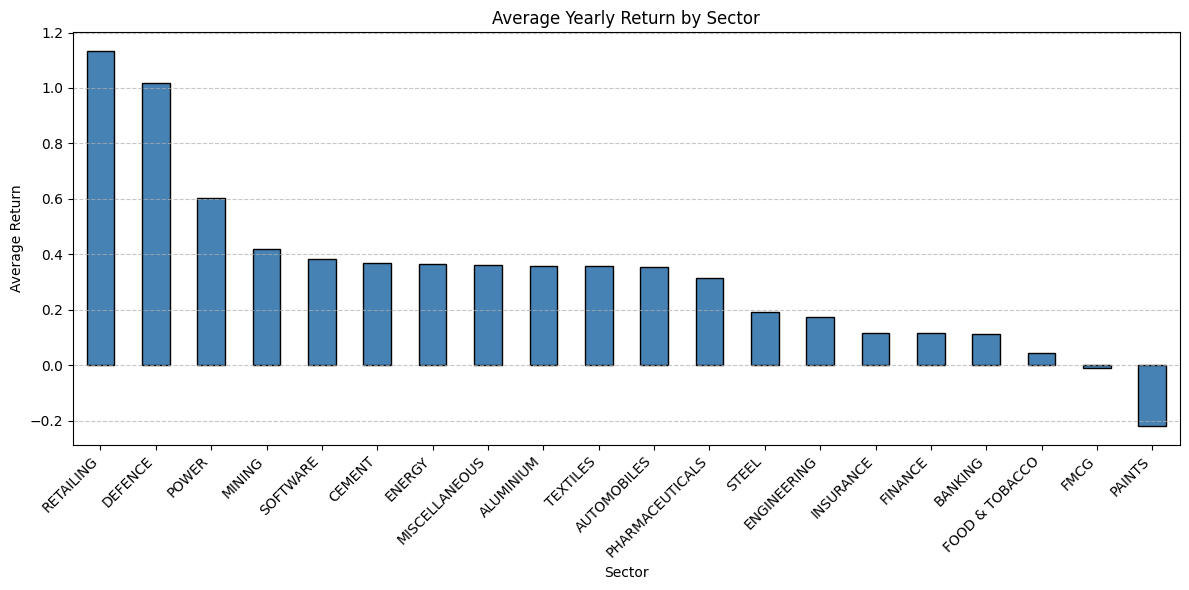

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
stock_data = df_all
sector_data = pd.read_csv(r"E:\Guvi Projects\project 2 stock\Sector_data - Sheet1.csv")

# Extract the Ticker from the 'Symbol' column (text after the colon)
sector_data['Ticker'] = sector_data['Symbol'].str.extract(r':\s*([A-Z]+)')

# Merge sector info into stock data
merged_data = pd.merge(stock_data, sector_data[['Ticker', 'sector']], on='Ticker', how='left')

# Convert 'date' to datetime and sort
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.sort_values(by=['Ticker', 'date'], inplace=True)

# Get first and last closing price of the year for each stock
first_close = merged_data.groupby('Ticker').first()['close']
last_close = merged_data.groupby('Ticker').last()['close']

# Calculate yearly return per stock
yearly_return = ((last_close - first_close) / first_close).reset_index()
yearly_return.columns = ['Ticker', 'Yearly_Return']

# Merge sector info again for yearly return data
yearly_sector_data = pd.merge(yearly_return, sector_data[['Ticker', 'sector']], on='Ticker', how='left')

# Calculate average yearly return per sector
sector_avg_return = yearly_sector_data.groupby('sector')['Yearly_Return'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
sector_avg_return.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Average Yearly Return by Sector")
plt.ylabel("Average Return")
plt.xlabel("Sector")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


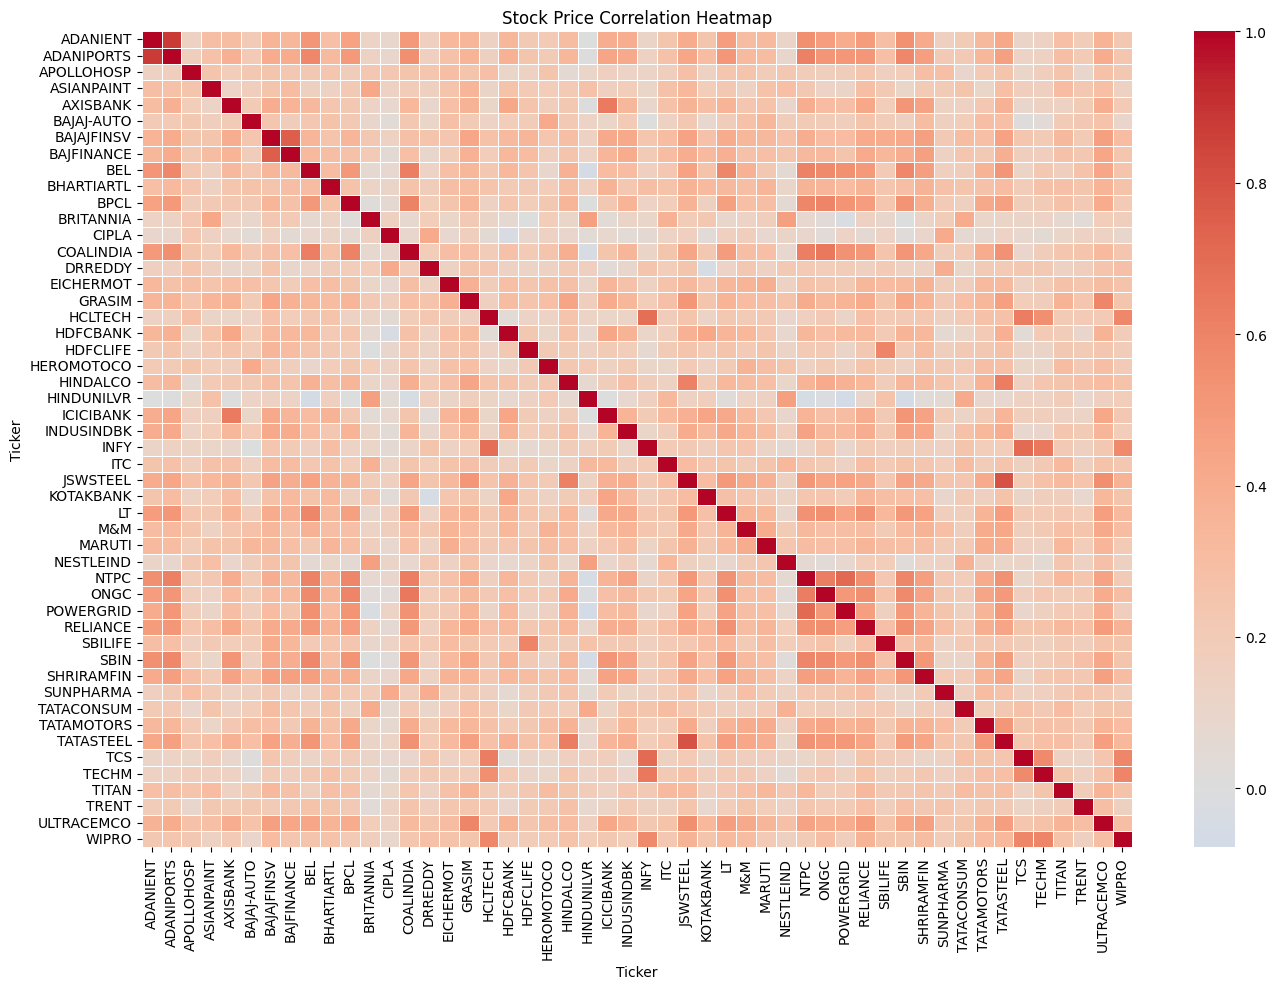

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the stock data
stock_data = df_all

# Convert date column to datetime
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data = stock_data.drop_duplicates(subset=['date', 'Ticker'], keep='last')

# Pivot data: rows = dates, columns = Ticker, values = close price
close_prices = stock_data.pivot(index='date', columns='Ticker', values='close')

# Calculate daily returns
pct_change = close_prices.pct_change()

# Compute correlation matrix
correlation_matrix = pct_change.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title("Stock Price Correlation Heatmap")
plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load the combined dataset (replace with your actual path if needed)
# df_all = pd.read_csv(r"E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\all_tickers_combined.csv")
df_all['date'] = pd.to_datetime(df_all['date'])

# Extract Year-Month for grouping
df_all['year_month'] = df_all['date'].dt.to_period('M')

# Sort for correct price tracking
df_all = df_all.sort_values(by=['Ticker', 'date'])

# Group by Ticker and Month to calculate monthly returns
monthly_returns = (
    df_all.groupby(['Ticker', 'year_month'])
    .agg(first_open=('open', 'first'), last_close=('close', 'last'))
    .reset_index()
)

# Calculate monthly return percentage
monthly_returns['monthly_return'] = (monthly_returns['last_close'] - monthly_returns['first_open']) / monthly_returns['first_open'] * 100

# Create output folder for plots
output_folder = Path(r"E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\monthly_charts")
output_folder.mkdir(parents=True, exist_ok=True)

# Plot top 5 gainers and losers for each month
unique_months = monthly_returns['year_month'].unique()

for month in unique_months:
    month_data = monthly_returns[monthly_returns['year_month'] == month]
    
    top_gainers = month_data.sort_values(by='monthly_return', ascending=False).head(5)
    top_losers = month_data.sort_values(by='monthly_return').head(5)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gainers chart
    axes[0].bar(top_gainers['Ticker'], top_gainers['monthly_return'], color='green')
    axes[0].set_title(f"{month} - Top 5 Gainers")
    axes[0].set_ylabel("Return (%)")
    axes[0].set_ylim(0, top_gainers['monthly_return'].max() + 10)

    # Losers chart
    axes[1].bar(top_losers['Ticker'], top_losers['monthly_return'], color='red')
    axes[1].set_title(f"{month} - Top 5 Losers")
    axes[1].set_ylabel("Return (%)")
    axes[1].set_ylim(top_losers['monthly_return'].min() - 10, 0)

    plt.suptitle(f"Top 5 Gainers & Losers - {month}", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save chart
    chart_path = output_folder / f"{month}_top_gainers_losers.png"
    plt.savefig(chart_path)
    plt.close()

    print(f"Saved chart for {month} to {chart_path}")


Saved chart for 2023-10 to E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\monthly_charts\2023-10_top_gainers_losers.png
Saved chart for 2023-11 to E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\monthly_charts\2023-11_top_gainers_losers.png
Saved chart for 2023-12 to E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\monthly_charts\2023-12_top_gainers_losers.png
Saved chart for 2024-01 to E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\monthly_charts\2024-01_top_gainers_losers.png
Saved chart for 2024-02 to E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\monthly_charts\2024-02_top_gainers_losers.png
Saved chart for 2024-03 to E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\monthly_charts\2024-03_top_gainers_losers.png
Saved chart for 2024-04 to E:\Guvi Projects\project 2 stock\codes\data (1)\tickers_csv\monthly_charts\2024-04_top_gainers_losers.png
Saved chart for 2024-05 to E:\Guvi Projects\project 2 stock\codes\dat